In [166]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy

In [167]:
IMG_WIDTH = 256
IMG_HEIGHT = 256
LEARNING_RATE = 0.001
BATCH_SIZE = 8

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory = r"C:\Users\riate\Documents\Velocity_Data_Science\ai_projects\traffic_sign_classification\research\data\Train",
    # labels="inferred",
    # label_mode="categorical",
    batch_size = BATCH_SIZE,
    image_size = (IMG_WIDTH, IMG_HEIGHT),
    shuffle = True,
    validation_split=0.2,
    subset="training",
    seed=43
)

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory = r"C:\Users\riate\Documents\Velocity_Data_Science\ai_projects\traffic_sign_classification\research\data\Train",
    # labels="inferred",
    # label_mode="categorical",
    batch_size = BATCH_SIZE,
    image_size = (IMG_WIDTH, IMG_HEIGHT),
    validation_split=0.2,
    subset="validation",
    seed=43
)

Found 39209 files belonging to 43 classes.
Using 31368 files for training.
Found 39209 files belonging to 43 classes.
Using 7841 files for validation.


In [168]:
classes = train_dataset.class_names

for image, labels in train_dataset:
    print(image.shape)
    print(labels.shape)
    break


print(len(classes))

(8, 256, 256, 3)
(8,)
43


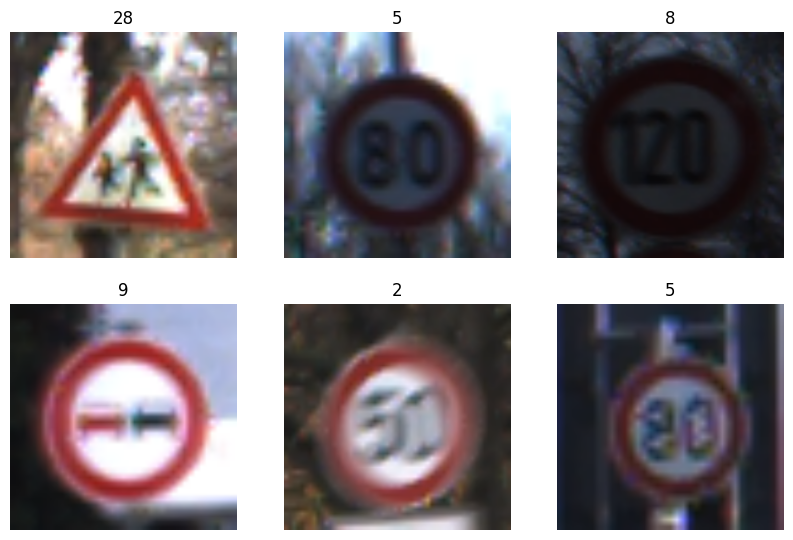

In [169]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(classes[labels[i]])
    plt.axis("off")

In [170]:
normalization_layer = tf.keras.layers.Rescaling(scale =1./255)

train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x),y))
val_dataset = val_dataset.map(lambda x,y: (normalization_layer(x),y))

AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
train_dataset = train_dataset.cache()

val_dataset = val_dataset.prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.cache()

In [171]:
# Preparing base model

model = tf.keras.applications.vgg16.VGG16(
    include_top=False,
    weights="imagenet",
)

for layer in model.layers:
    layer.trainable = False
    

# preparing custom model

inputs = tf.keras.Input(shape=(IMG_HEIGHT, IMG_WIDTH,3))
x = model(inputs, training=False)
x = tf.keras.layers.Flatten()(x)

outputs = tf.keras.layers.Dense(units=43,
                                activation="softmax")(x)

final_model  = tf.keras.Model(inputs, outputs)

final_model.summary()

Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_32 (InputLayer)       [(None, 256, 256, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 flatten_15 (Flatten)        (None, 32768)             0         
                                                                 
 dense_15 (Dense)            (None, 43)                1409067   
                                                                 
Total params: 16123755 (61.51 MB)
Trainable params: 1409067 (5.38 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [172]:
final_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=["accuracy"])



In [173]:
final_model.fit(train_dataset,
          epochs=5,
          validation_data=val_dataset)

Epoch 1/5


1551/3921 [==========>...................] - ETA: 53:38 - loss: 2.2735 - accuracy: 0.5626

: 